# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [ ]:
!pip install .

In [ ]:
!pip install protobuf==3.20.3

In [ ]:
!pip install torch

## Restart the Kernel
Restart the Kernel, and verify the protobuf version. 

In [ ]:
import google.protobuf
print(google.protobuf.__version__)


## Instructions
The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

In [ ]:
states[0]

In [ ]:
states[1]

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [ ]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(2)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(2, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from unityagents import UnityEnvironment
from ddpg_agent import Agent

In [2]:
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Found path: /data/Tennis_Linux_NoVis/Tennis.x86_64
Mono path[0] = '/data/Tennis_Linux_NoVis/Tennis_Data/Managed'
Mono config path = '/data/Tennis_Linux_NoVis/Tennis_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/student/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
env_info = env.reset(train_mode=True)[brain_name]

# size of each action
action_size = brain.vector_action_space_size

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]

agent = Agent(state_size=state_size, action_size=action_size, random_seed = 10)

Episode 100	Average Score: 0.00	Score: -0.00	Total updates 1430
Episode 200	Average Score: 0.00	Score: -0.00	Total updates 2850
Episode 300	Average Score: 0.00	Score: -0.00	Total updates 4270
Episode 400	Average Score: 0.00	Score: -0.00	Total updates 5690
Episode 500	Average Score: 0.00	Score: -0.00	Total updates 7110
Episode 600	Average Score: 0.00	Score: -0.00	Total updates 8530
Episode 700	Average Score: 0.00	Score: -0.00	Total updates 9950
Episode 800	Average Score: 0.00	Score: -0.00	Total updates 11370
Episode 900	Average Score: 0.00	Score: -0.00	Total updates 12790
Episode 1000	Average Score: 0.00	Score: -0.00	Total updates 14260
Episode 1100	Average Score: 0.00	Score: -0.00	Total updates 15680
Episode 1200	Average Score: 0.00	Score: -0.00	Total updates 17100
Episode 1300	Average Score: 0.00	Score: -0.00	Total updates 18520
Episode 1400	Average Score: 0.00	Score: -0.00	Total updates 19940
Episode 1500	Average Score: 0.00	Score: -0.00	Total updates 21360
Episode 1600	Average Score

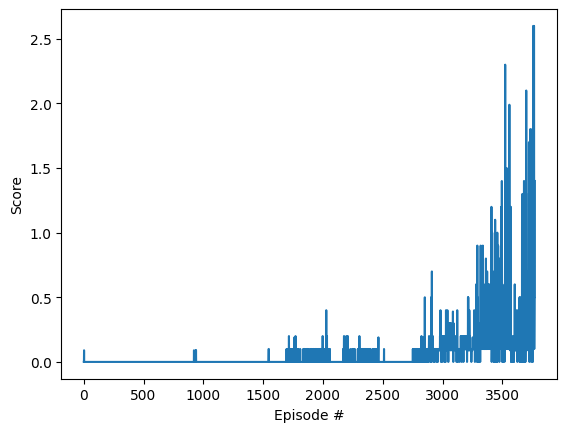

In [4]:
def ddpg(n_episodes=5000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    t_counter = 1
    total_updates = 0
    for i_episode in range(1, n_episodes+1):
        #print(f"\r episode number is {i_episode}", end='', flush=True)
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        #state = env.reset()
        agent.reset()
        score = np.zeros(2) 
        for t in range(max_t):
            actions = agent.act(states)

            env_info = env.step(actions)[brain_name]  
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            #scores += env_info.rewards                         # update the score (for each agent)
            #dones_ = env_info.local_done
            #next_state, reward, done, _ = env.step(action)
            agent.update_memory(states, actions, rewards, next_states, dones)
            
            
            if t_counter % 10 == 0:
                for _ in range(10):
                    agent.step()
                    total_updates += 1
            
            states = next_states
            score += env_info.rewards
            t_counter += 1
            
            if True in dones:
                #print("breaking")
                break 
        scores_deque.append(np.max(score))
        scores.append(np.max(score))
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}\tTotal updates {}'.format(i_episode, np.mean(scores_deque), np.mean(score),total_updates), end="")
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        
        if len(scores_deque) >= 100 and np.mean(scores_deque) >= 0.5:
            print(f"\nenv was solved within {i_episode - 100} episodes with 100-moving average score of {np.mean(scores_deque)}")
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
        
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
for i,j in enumerate(["a","b"]):
    print(i,j)

In [ ]:
agent.noise_1.sample()

In [ ]:
h